安裝以下套件：</br>
pip install transformers[sentencepiece]</br>
pip install datasets

In [1]:
!pip install transformers[sentencepiece]
!pip install datasets

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./../data/sa_train_0111.csv')


In [4]:
df.head()

,com_type,corpus,title,clean_content,score
0,遠傳,"台哥大併購台星後,好多鍵盤酸民喔[SEP]\n我比較好奇這些杞人憂天的 在擔心甚麼\n1.台...","台哥大併購台星後,好多鍵盤酸民喔",\n我比較好奇這些杞人憂天的 在擔心甚麼\n1.台灣大不履約 就直接告上公平會\n\n2.手...,1
1,遠傳,台星用戶一堆再吹哨壯膽，台哥大保證合約可沒保證品質[SEP]被抗議還能早上關機晚上開基地台，...,台星用戶一堆再吹哨壯膽，台哥大保證合約可沒保證品質,被抗議還能早上關機晚上開基地台，你還看不懂電信商省錢手法嗎。早上使用用戶少就關基地台或降功率...,2
2,遠傳,"台星用戶一堆再吹哨壯膽，台哥大保證合約可沒保證品質[SEP]\n\n\n應該是遠傳最小氣吧,...",台星用戶一堆再吹哨壯膽，台哥大保證合約可沒保證品質,"\n\n\n應該是遠傳最小氣吧,試用卡還只有5GB流量\n",3
3,遠傳,台星用戶一堆再吹哨壯膽，台哥大保證合約可沒保證品質[SEP]\n\n\n\n樓主分析的有理，...,台星用戶一堆再吹哨壯膽，台哥大保證合約可沒保證品質,\n\n\n\n樓主分析的有理，如果遇到品質受影響，受不了的原台哥用戶，說不定想轉到遠傳或中...,2
4,遠傳,發現台哥大併購台星後，版上出現的一個現象??[SEP]\n感覺台灣大哥大會優先處理台灣之星員...,發現台哥大併購台星後，版上出現的一個現象??,\n感覺台灣大哥大會優先處理台灣之星員工，台灣之星門號應該會等到拆4G基地台，讓他們自然消失...,1


In [5]:
import math
df['content'] =  '對' + df['com_type'].fillna(' ')+ '的看法:[SEP]' + df['clean_content'].fillna(' ')
df.head(3)

,com_type,corpus,title,clean_content,score,content
0,遠傳,"台哥大併購台星後,好多鍵盤酸民喔[SEP]\n我比較好奇這些杞人憂天的 在擔心甚麼\n1.台...","台哥大併購台星後,好多鍵盤酸民喔",\n我比較好奇這些杞人憂天的 在擔心甚麼\n1.台灣大不履約 就直接告上公平會\n\n2.手...,1,對遠傳的看法:[SEP]\n我比較好奇這些杞人憂天的 在擔心甚麼\n1.台灣大不履約 就直接...
1,遠傳,台星用戶一堆再吹哨壯膽，台哥大保證合約可沒保證品質[SEP]被抗議還能早上關機晚上開基地台，...,台星用戶一堆再吹哨壯膽，台哥大保證合約可沒保證品質,被抗議還能早上關機晚上開基地台，你還看不懂電信商省錢手法嗎。早上使用用戶少就關基地台或降功率...,2,對遠傳的看法:[SEP]被抗議還能早上關機晚上開基地台，你還看不懂電信商省錢手法嗎。早上使用...
2,遠傳,"台星用戶一堆再吹哨壯膽，台哥大保證合約可沒保證品質[SEP]\n\n\n應該是遠傳最小氣吧,...",台星用戶一堆再吹哨壯膽，台哥大保證合約可沒保證品質,"\n\n\n應該是遠傳最小氣吧,試用卡還只有5GB流量\n",3,"對遠傳的看法:[SEP]\n\n\n應該是遠傳最小氣吧,試用卡還只有5GB流量\n"


In [6]:
df.shape

(5068, 6)

In [7]:
# from bs4 import BeautifulSoup
import re

def pre_process(text):

  text = re.sub("\n", "", text)
  text = re.sub("https?:\/\/\S*", "", text)
  # split text into tokens to remove whitespaces
  tokens = text.split()
  return " ".join(tokens)

df['content'] = df['content'].apply(pre_process)
df['content'] 

0       對遠傳的看法:[SEP]我比較好奇這些杞人憂天的 在擔心甚麼1.台灣大不履約 就直接告上公平...
1       對遠傳的看法:[SEP]被抗議還能早上關機晚上開基地台，你還看不懂電信商省錢手法嗎。早上使用...
2                       對遠傳的看法:[SEP]應該是遠傳最小氣吧,試用卡還只有5GB流量
3       對遠傳的看法:[SEP]樓主分析的有理，如果遇到品質受影響，受不了的原台哥用戶，說不定想轉到...
4       對遠傳的看法:[SEP]感覺台灣大哥大會優先處理台灣之星員工，台灣之星門號應該會等到拆4G基...
                              ...                        
5063         對台星或台灣之星的看法:[SEP]台哥319跟遠傳399都可以，亞太不推，中華太貴，台星
5064    對台星或台灣之星的看法:[SEP]如題：請問ac810s和ac800s都3CA除網速下載60...
5065    對台星或台灣之星的看法:[SEP]我都懶得說了 ??都把自己當三大來經營了??還是那句老話亞...
5066    對台星或台灣之星的看法:[SEP]B11 如果真的如他所說 那一開始就應該說清楚 讓有需求的...
5067    對台星或台灣之星的看法:[SEP]B8 門市講的應該沒錯以前有方法閃掉YouTube的限速我...
Name: content, Length: 5068, dtype: object

In [8]:
df = df.drop(df.index[df.score.isna()],axis=0)
df = df.drop(df.index[~df.score.isin([1,2,3,4,5,0])],axis=0)

In [9]:
data = df[['content','score']]

In [10]:
data.head()

,content,score
0,對遠傳的看法:[SEP]我比較好奇這些杞人憂天的 在擔心甚麼1.台灣大不履約 就直接告上公平...,1
1,對遠傳的看法:[SEP]被抗議還能早上關機晚上開基地台，你還看不懂電信商省錢手法嗎。早上使用...,2
2,"對遠傳的看法:[SEP]應該是遠傳最小氣吧,試用卡還只有5GB流量",3
3,對遠傳的看法:[SEP]樓主分析的有理，如果遇到品質受影響，受不了的原台哥用戶，說不定想轉到...,2
4,對遠傳的看法:[SEP]感覺台灣大哥大會優先處理台灣之星員工，台灣之星門號應該會等到拆4G基...,1


In [11]:
class_map = {1:0, 2:1, 3:2, 4:3, 5:4}
data['score']=data['score'].map(class_map)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
data['score'].unique()

array([0, 1, 2, 3, 4])

In [13]:
from sklearn.model_selection import train_test_split

train, valid = train_test_split(data,
                                                      test_size=0.2, 
                                                      random_state=42,
                                                      stratify=data[['score']])

In [14]:
train.shape

(4054, 2)

Text(0.5, 0, 'review score')

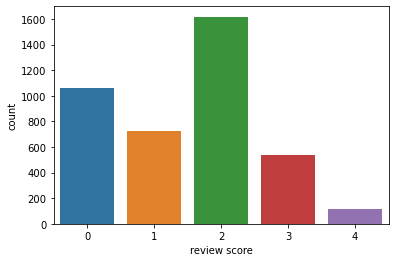

In [15]:
sns.countplot(train['score'])
plt.xlabel('review score')

In [16]:
train.to_csv('train.csv',index=False)
valid.to_csv('valid.csv',index=False)

In [17]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, DataCollatorWithPadding
from datasets import load_dataset
import pandas as pd
import numpy as np
import os
import torch
from tqdm.notebook import tqdm

tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

data=load_dataset('csv', data_files={'train':['./train.csv'], 
                                     'valid':['./valid.csv']})
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'

Using custom data configuration default-55426db97e23b92f


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /home/jovyan/.cache/huggingface/datasets/csv/default-55426db97e23b92f/0.0.0/6b9057d9e23d9d8a2f05b985917a0da84d70c5dae3d22ddd8a3f22fb01c69d9e. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [18]:
def tokenize_function(data:dict):
    return tokenizer(data['content'],padding=True,truncation=True, max_length=512)

tokenized_data=data.map(tokenize_function, batched=True)

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

In [19]:
print(tokenized_data)

DatasetDict({
    train: Dataset({
        features: ['attention_mask', 'content', 'input_ids', 'score', 'token_type_ids'],
        num_rows: 4054
    })
    valid: Dataset({
        features: ['attention_mask', 'content', 'input_ids', 'score', 'token_type_ids'],
        num_rows: 1014
    })
})


In [20]:
tokenized_data = tokenized_data.remove_columns(['content'])
tokenized_data = tokenized_data.rename_column('score','labels')
tokenized_data.set_format('torch',device='cuda')
tokenized_data['train'].column_names

['attention_mask', 'input_ids', 'labels', 'token_type_ids']

In [21]:
tokenized_data.set_format('torch',device='cuda')

In [22]:
tokenized_data

DatasetDict({
    train: Dataset({
        features: ['attention_mask', 'input_ids', 'labels', 'token_type_ids'],
        num_rows: 4054
    })
    valid: Dataset({
        features: ['attention_mask', 'input_ids', 'labels', 'token_type_ids'],
        num_rows: 1014
    })
})

In [23]:
tokenized_data["train"]

Dataset({
    features: ['attention_mask', 'input_ids', 'labels', 'token_type_ids'],
    num_rows: 4054
})

In [24]:
tokenized_data['train']['input_ids'][0]

tensor([  101,  3271,  8513,  2004,  5975,  6028,  5020,   131,   102,  6668,
          100,  2415,  6990,  7765,  3657,  8513,  2004,  3207,  3922,  2976,
         2967,  1728, 10032,  7749,  2165,  4267,  1742,  3207,  3922,  2380,
         2181,  3219,  9232,  1920,  4700,  6885, 10032,  6668,   100,  4988,
         9069,  1904, 10032,  3901,  4243,  4035,  3042, 10032,  1659,  5836,
         6401,  3042,  8453,  1812, 10032,  4346,  4459,  2078,  3901,  4449,
         1651,  9028,   109, 36180,  2427,  2187,  9438,   125, 10251,  9028,
         7503,  1659,  2100,  6695,  6552,  7749, 19062,  9030,  1763,  1728,
        10032,  4337,  3498,   126,  4448,  8536,  4449,  1651,  9028,   109,
        48147,  2187,  4459,  1716,  1659,  6695,  6552,  7749,  6021,  4106,
         8453,  6269,  1728, 10032,  3901,  7080,  3441,  1658,  4530,  2056,
         1483,   102,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0, 

In [25]:
tokenizer.decode(tokenized_data['train']['input_ids'][0])

'[CLS] 對 遠 傳 的 看 法 : [SEP] 總 [UNK] 可 能 覺 得 遠 傳 客 戶 太 多 了 ， 要 分 散 些 客 戶 去 別 家 電 信 業 者 ， 總 [UNK] 沒 關 係 ， 我 支 持 妳 ， 不 用 等 妳 退 休 ， 星 期 六 我 有 一 門 $ 999 吃 到 飽 4g 門 號 不 再 續 約 要 np 閃 人 了 ， 明 年 5 月 還 有 一 門 $ 688 到 期 也 不 續 約 要 直 接 退 租 了 ， 我 自 己 下 架 先 。 [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [

In [26]:
from torch.utils.data import DataLoader

BATCHSIZE = 30

train_dataloader = DataLoader(
    tokenized_data["train"], shuffle=True, batch_size=BATCHSIZE, collate_fn=data_collator
)
valid_dataloader = DataLoader(
    tokenized_data["valid"], shuffle=True, batch_size=BATCHSIZE, collate_fn=data_collator
)

In [27]:
for batch in train_dataloader:
    break
{k: v.shape for k, v in batch.items()}

{'attention_mask': torch.Size([30, 512]),
 'input_ids': torch.Size([30, 512]),
 'labels': torch.Size([30]),
 'token_type_ids': torch.Size([30, 512])}

In [28]:
RoBERTa_model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

class RoBERTaClass(torch.nn.Module):
    def __init__(self):
        super(RoBERTaClass, self).__init__()
        self.l1 = RoBERTa_model.base_model
        self.l2 = torch.nn.Dropout(0.3)
        self.l3 = torch.nn.Linear(768, 5)
        
    def forward(self, input_ids, attention_mask, token_type_ids):
        pooler_output = self.l1(input_ids, attention_mask, token_type_ids)[1]
        output_2 = self.l2(pooler_output)
        output = self.l3(output_2)
        return output
    
model = RoBERTaClass()
model = torch.nn.DataParallel(model)
model.to(device)

DataParallel(
  (module): RoBERTaClass(
    (l1): BertModel(
      (embeddings): BertEmbeddings(
        (word_embeddings): Embedding(105879, 768, padding_idx=0)
        (position_embeddings): Embedding(512, 768)
        (token_type_embeddings): Embedding(2, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): BertEncoder(
        (layer): ModuleList(
          (0): BertLayer(
            (attention): BertAttention(
              (self): BertSelfAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
              (output): BertSelfOutput(
                (dense): Linear(in_features=768, out_features=768, bias=True)
               

In [29]:
LEARNING_RATE = 3e-05

def loss_fn(output, labels):
    return torch.nn.CrossEntropyLoss()(output, labels)

optimizer = torch.optim.AdamW(params =  model.parameters(), lr=LEARNING_RATE)

In [30]:
train_losses = []

def train(epoch):
    model.train() #將 model 設為 training mode
    total_loss = 0
    
    for data in tqdm(train_dataloader):
        input_ids = data['input_ids'].to(device, dtype = torch.long)
        attention_mask = data['attention_mask'].to(device, dtype = torch.long)
        token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
        labels = data['labels'].to(device, dtype = torch.long)
        
        outputs = model(input_ids, attention_mask, token_type_ids)
        loss = loss_fn(outputs, labels)
        total_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    train_loss = total_loss/len(train_dataloader)
    train_losses.append(train_loss)
    print(f'Epoch:{epoch+1}, Trianing Loss:{total_loss}')

In [31]:
eval_losses = []
eval_accu = []
y_pred = []
y_true = []

def evaluation(eval_data):
    model.eval() #將 model 設為 evaluation mode
    total_loss = 0
    total = 0
    correct = 0
    
    print('Evaluating...')
    with torch.no_grad():
        for data in eval_data:
            input_ids = data['input_ids'].to(device, dtype = torch.long)
            attention_mask = data['attention_mask'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
            labels = data['labels'].to(device, dtype = torch.long)

            outputs = model(input_ids, attention_mask, token_type_ids)
            _, predict = outputs.max(1)
            total += labels.size(0)
            correct += predict.eq(labels).sum().item()
            loss = loss_fn(outputs, labels)
            total_loss += loss.item()
            
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predict.cpu().numpy())
            
    accu = 100.*correct/total
    eval_loss = total_loss/len(eval_data)
    eval_losses.append(eval_loss)
    eval_accu.append(accu)
    print(f'Evaluation Loss:{total_loss}, Accuracy:{accu:.3f}%')

In [32]:
EPOCH = 60

for param in model.module.l1.parameters():
    param.requires_grad = False

for epoch in range(EPOCH):
    if EPOCH==10:
        for param in model.module.l1.parameters():
            param.requires_grad = True
            
    train(epoch)
    evaluation(valid_dataloader)

  0%|          | 0/136 [00:00<?, ?it/s]

Epoch:1, Trianing Loss:198.6330394744873
Evaluating...
Evaluation Loss:46.01634180545807, Accuracy:63.314%


  0%|          | 0/136 [00:00<?, ?it/s]

Epoch:2, Trianing Loss:175.2726879119873
Evaluating...
Evaluation Loss:41.15009105205536, Accuracy:64.497%


  0%|          | 0/136 [00:00<?, ?it/s]

Epoch:3, Trianing Loss:159.92608654499054
Evaluating...
Evaluation Loss:37.80905359983444, Accuracy:64.793%


  0%|          | 0/136 [00:00<?, ?it/s]

Epoch:4, Trianing Loss:149.17673844099045
Evaluating...
Evaluation Loss:35.327700197696686, Accuracy:64.793%


  0%|          | 0/136 [00:00<?, ?it/s]

Epoch:5, Trianing Loss:140.97939175367355
Evaluating...
Evaluation Loss:33.40201359987259, Accuracy:65.385%


  0%|          | 0/136 [00:00<?, ?it/s]

Epoch:6, Trianing Loss:135.28780782222748
Evaluating...
Evaluation Loss:31.854117035865784, Accuracy:66.568%


  0%|          | 0/136 [00:00<?, ?it/s]

Epoch:7, Trianing Loss:129.88202381134033
Evaluating...
Evaluation Loss:30.59146159887314, Accuracy:67.456%


  0%|          | 0/136 [00:00<?, ?it/s]

Epoch:8, Trianing Loss:124.755890250206
Evaluating...
Evaluation Loss:29.48662155866623, Accuracy:68.245%


  0%|          | 0/136 [00:00<?, ?it/s]

Epoch:9, Trianing Loss:121.67986649274826
Evaluating...
Evaluation Loss:28.46894097328186, Accuracy:69.527%


  0%|          | 0/136 [00:00<?, ?it/s]

Epoch:10, Trianing Loss:119.02934241294861
Evaluating...
Evaluation Loss:27.67736929655075, Accuracy:70.513%


  0%|          | 0/136 [00:00<?, ?it/s]

Epoch:11, Trianing Loss:115.28355485200882
Evaluating...
Evaluation Loss:26.95067608356476, Accuracy:71.696%


  0%|          | 0/136 [00:00<?, ?it/s]

Epoch:12, Trianing Loss:113.55392986536026
Evaluating...
Evaluation Loss:26.244626462459564, Accuracy:72.584%


  0%|          | 0/136 [00:00<?, ?it/s]

Epoch:13, Trianing Loss:110.60712605714798
Evaluating...
Evaluation Loss:25.641005516052246, Accuracy:73.077%


  0%|          | 0/136 [00:00<?, ?it/s]

Epoch:14, Trianing Loss:108.40740114450455
Evaluating...
Evaluation Loss:25.097049593925476, Accuracy:74.359%


  0%|          | 0/136 [00:00<?, ?it/s]

Epoch:15, Trianing Loss:106.97286069393158
Evaluating...
Evaluation Loss:24.57881397008896, Accuracy:74.852%


  0%|          | 0/136 [00:00<?, ?it/s]

Epoch:16, Trianing Loss:105.07189238071442
Evaluating...
Evaluation Loss:24.156854450702667, Accuracy:76.134%


  0%|          | 0/136 [00:00<?, ?it/s]

Epoch:17, Trianing Loss:102.4653285741806
Evaluating...
Evaluation Loss:23.691119492053986, Accuracy:76.331%


  0%|          | 0/136 [00:00<?, ?it/s]

Epoch:18, Trianing Loss:102.034469217062
Evaluating...
Evaluation Loss:23.30116719007492, Accuracy:76.726%


  0%|          | 0/136 [00:00<?, ?it/s]

Epoch:19, Trianing Loss:101.20126959681511
Evaluating...
Evaluation Loss:22.923488795757294, Accuracy:77.712%


  0%|          | 0/136 [00:00<?, ?it/s]

Epoch:20, Trianing Loss:99.53524541854858
Evaluating...
Evaluation Loss:22.57112157344818, Accuracy:78.304%


  0%|          | 0/136 [00:00<?, ?it/s]

Epoch:21, Trianing Loss:97.71127128601074
Evaluating...
Evaluation Loss:22.23428675532341, Accuracy:78.797%


  0%|          | 0/136 [00:00<?, ?it/s]

Epoch:22, Trianing Loss:97.04597875475883
Evaluating...
Evaluation Loss:21.935040146112442, Accuracy:78.797%


  0%|          | 0/136 [00:00<?, ?it/s]

Epoch:23, Trianing Loss:96.76224437355995
Evaluating...
Evaluation Loss:21.630971252918243, Accuracy:78.994%


  0%|          | 0/136 [00:00<?, ?it/s]

Epoch:24, Trianing Loss:94.24163499474525
Evaluating...
Evaluation Loss:21.388631641864777, Accuracy:80.276%


  0%|          | 0/136 [00:00<?, ?it/s]

Epoch:25, Trianing Loss:94.53190585970879
Evaluating...
Evaluation Loss:21.17055594921112, Accuracy:80.572%


  0%|          | 0/136 [00:00<?, ?it/s]

Epoch:26, Trianing Loss:93.5010477900505
Evaluating...
Evaluation Loss:20.92171561717987, Accuracy:80.769%


  0%|          | 0/136 [00:00<?, ?it/s]

Epoch:27, Trianing Loss:91.72101733088493
Evaluating...
Evaluation Loss:20.664428681135178, Accuracy:80.966%


  0%|          | 0/136 [00:00<?, ?it/s]

Epoch:28, Trianing Loss:92.24989277124405
Evaluating...
Evaluation Loss:20.43363532423973, Accuracy:81.164%


  0%|          | 0/136 [00:00<?, ?it/s]

Epoch:29, Trianing Loss:91.0239577293396
Evaluating...
Evaluation Loss:20.24325406551361, Accuracy:81.361%


  0%|          | 0/136 [00:00<?, ?it/s]

Epoch:30, Trianing Loss:91.44833290576935
Evaluating...
Evaluation Loss:20.02042856812477, Accuracy:81.657%


  0%|          | 0/136 [00:00<?, ?it/s]

Epoch:31, Trianing Loss:89.94504025578499
Evaluating...
Evaluation Loss:19.864091634750366, Accuracy:82.150%


  0%|          | 0/136 [00:00<?, ?it/s]

Epoch:32, Trianing Loss:89.55675908923149
Evaluating...
Evaluation Loss:19.659069657325745, Accuracy:82.446%


  0%|          | 0/136 [00:00<?, ?it/s]

Epoch:33, Trianing Loss:88.56560063362122
Evaluating...
Evaluation Loss:19.484825670719147, Accuracy:82.939%


  0%|          | 0/136 [00:00<?, ?it/s]

Epoch:34, Trianing Loss:89.04080832004547
Evaluating...
Evaluation Loss:19.293296843767166, Accuracy:83.136%


  0%|          | 0/136 [00:00<?, ?it/s]

Epoch:35, Trianing Loss:88.47617623209953
Evaluating...
Evaluation Loss:19.16387438774109, Accuracy:83.235%


  0%|          | 0/136 [00:00<?, ?it/s]

Epoch:36, Trianing Loss:86.77572867274284
Evaluating...
Evaluation Loss:19.05326798558235, Accuracy:83.136%


  0%|          | 0/136 [00:00<?, ?it/s]

Epoch:37, Trianing Loss:86.12621334195137
Evaluating...
Evaluation Loss:18.903061091899872, Accuracy:83.333%


  0%|          | 0/136 [00:00<?, ?it/s]

Epoch:38, Trianing Loss:86.5672889649868
Evaluating...
Evaluation Loss:18.733027547597885, Accuracy:83.925%


  0%|          | 0/136 [00:00<?, ?it/s]

Epoch:39, Trianing Loss:85.5868408381939
Evaluating...
Evaluation Loss:18.59340274333954, Accuracy:84.024%


  0%|          | 0/136 [00:00<?, ?it/s]

Epoch:40, Trianing Loss:84.491818100214
Evaluating...
Evaluation Loss:18.494323790073395, Accuracy:84.418%


  0%|          | 0/136 [00:00<?, ?it/s]

Epoch:41, Trianing Loss:84.73033797740936
Evaluating...
Evaluation Loss:18.340573966503143, Accuracy:84.122%


  0%|          | 0/136 [00:00<?, ?it/s]

Epoch:42, Trianing Loss:85.55574107170105
Evaluating...
Evaluation Loss:18.242221415042877, Accuracy:84.122%


  0%|          | 0/136 [00:00<?, ?it/s]

Epoch:43, Trianing Loss:85.33685666322708
Evaluating...
Evaluation Loss:18.06550043821335, Accuracy:84.221%


  0%|          | 0/136 [00:00<?, ?it/s]

Epoch:44, Trianing Loss:84.20437771081924
Evaluating...
Evaluation Loss:17.968381851911545, Accuracy:84.221%


  0%|          | 0/136 [00:00<?, ?it/s]

Epoch:45, Trianing Loss:83.64115354418755
Evaluating...
Evaluation Loss:17.851776093244553, Accuracy:84.418%


  0%|          | 0/136 [00:00<?, ?it/s]

Epoch:46, Trianing Loss:82.67260682582855
Evaluating...
Evaluation Loss:17.756555765867233, Accuracy:84.714%


  0%|          | 0/136 [00:00<?, ?it/s]

Epoch:47, Trianing Loss:82.87679275870323
Evaluating...
Evaluation Loss:17.659524500370026, Accuracy:84.911%


  0%|          | 0/136 [00:00<?, ?it/s]

Epoch:48, Trianing Loss:81.1542586684227
Evaluating...
Evaluation Loss:17.532708168029785, Accuracy:85.010%


  0%|          | 0/136 [00:00<?, ?it/s]

Epoch:49, Trianing Loss:81.96871370077133
Evaluating...
Evaluation Loss:17.486800402402878, Accuracy:85.108%


  0%|          | 0/136 [00:00<?, ?it/s]

Epoch:50, Trianing Loss:82.8996612727642
Evaluating...
Evaluation Loss:17.354498833417892, Accuracy:85.404%


  0%|          | 0/136 [00:00<?, ?it/s]

Epoch:51, Trianing Loss:81.07805806398392
Evaluating...
Evaluation Loss:17.260967075824738, Accuracy:85.306%


  0%|          | 0/136 [00:00<?, ?it/s]

Epoch:52, Trianing Loss:81.15521359443665
Evaluating...
Evaluation Loss:17.14390590786934, Accuracy:85.306%


  0%|          | 0/136 [00:00<?, ?it/s]

Epoch:53, Trianing Loss:80.43503141403198
Evaluating...
Evaluation Loss:17.104953110218048, Accuracy:85.799%


  0%|          | 0/136 [00:00<?, ?it/s]

Epoch:54, Trianing Loss:80.61532869935036
Evaluating...
Evaluation Loss:17.016915649175644, Accuracy:85.503%


  0%|          | 0/136 [00:00<?, ?it/s]

Epoch:55, Trianing Loss:80.77795585989952
Evaluating...
Evaluation Loss:16.993851393461227, Accuracy:85.602%


  0%|          | 0/136 [00:00<?, ?it/s]

Epoch:56, Trianing Loss:80.0601775944233
Evaluating...
Evaluation Loss:16.834455460309982, Accuracy:85.700%


  0%|          | 0/136 [00:00<?, ?it/s]

Epoch:57, Trianing Loss:79.6443041563034
Evaluating...
Evaluation Loss:16.794691771268845, Accuracy:85.602%


  0%|          | 0/136 [00:00<?, ?it/s]

Epoch:58, Trianing Loss:79.2567782998085
Evaluating...
Evaluation Loss:16.681358367204666, Accuracy:85.799%


  0%|          | 0/136 [00:00<?, ?it/s]

Epoch:59, Trianing Loss:78.67636862397194
Evaluating...
Evaluation Loss:16.65727272629738, Accuracy:85.602%


  0%|          | 0/136 [00:00<?, ?it/s]

Epoch:60, Trianing Loss:79.13119208812714
Evaluating...
Evaluation Loss:16.52362185716629, Accuracy:85.799%
